Modify the following line if necessary to change to appropriate directory

In [1]:
cd ~/Documents/active_subspaces/tutorials/test_functions/otl_circuit

[Errno 2] No such file or directory: '/Users/constantine/Documents/active_subspaces/tutorials/test_functions/otl_circuit'
/Users/constantine/Dropbox/Codes/python/path/active_subspaces/tutorials/test_functions/otl_circuit


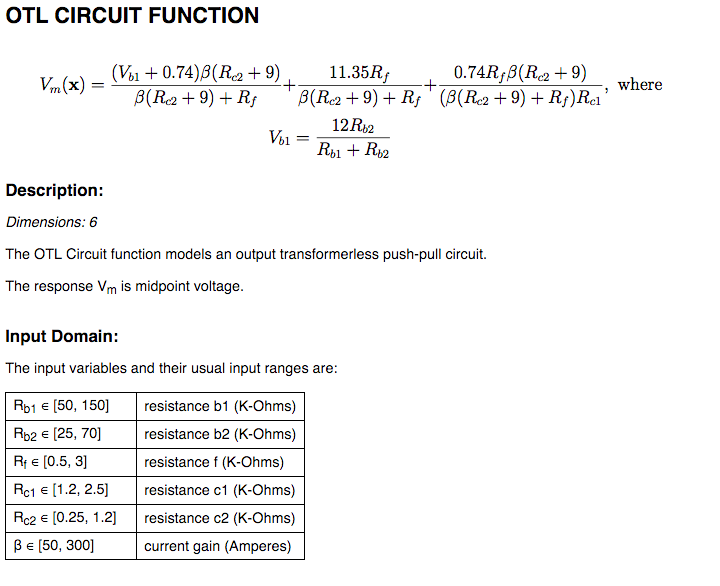

In [2]:
from IPython.display import Image
Image(filename='otl_circuit.png')

Load data from data.npz file

In [3]:
import numpy as np
import active_subspaces
import matplotlib.pyplot as plt

# Load the data 
npzfile = np.load('data.npz')
f = npzfile['f'] #Model evaluations
df = npzfile['df'] #Gradient evaluations
m = npzfile['m'] #Number of inputs
n = npzfile['n'] #Dimension of active subspace
M = npzfile['M'] #Number of monte carlo samples
x0 = npzfile['x0'] #Sample data points
evals = npzfile['evals'] #Eigenvalues
W = npzfile['W'] #Eigenvectors
k = 1000 #number of data points used for plotting sufficient summary

sub = active_subspaces.subspaces.Subspaces()
sub.compute(df, n_boot=100)

# Rewrite the active/inactive subspace variables to be n-dimensional
W1 = W[:,:n]
W2 = W[:,n:]
# Define the active/inactive variables 
Y, Z = np.dot(x0[1:k,:], W1), np.dot(x0[1:k,:], W2)

/Users/constantine/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Plot Monte Carlo estimated eigenvalues with bootstrap intervals. Note that bootstrap intervals are not visible due to large number of samples (M = 100,000).

In [ ]:
active_subspaces.utils.plotters.eigenvalues(sub.eigenvalues,e_br=sub.e_br)

Plot Gauss-Legendre Quadrature eigenvalues

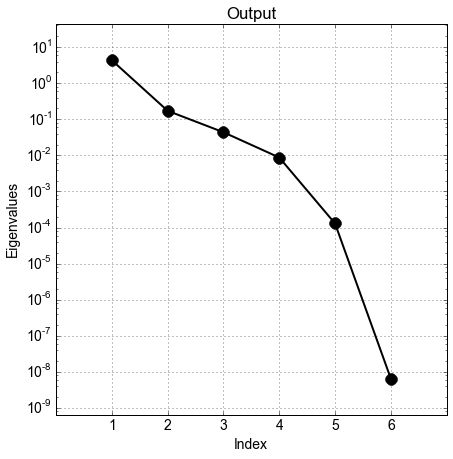

In [8]:
active_subspaces.utils.plotters.eigenvalues(evals)

Plot bootstrap estimates of the subspace errors with confidence intervals

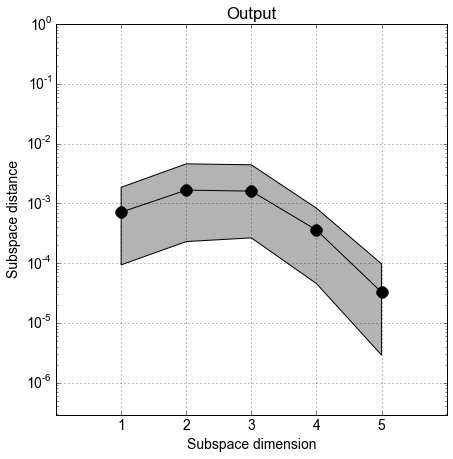

In [9]:
active_subspaces.utils.plotters.subspace_errors(sub.sub_br)


Plot 1 & 2D sufficient summary plots

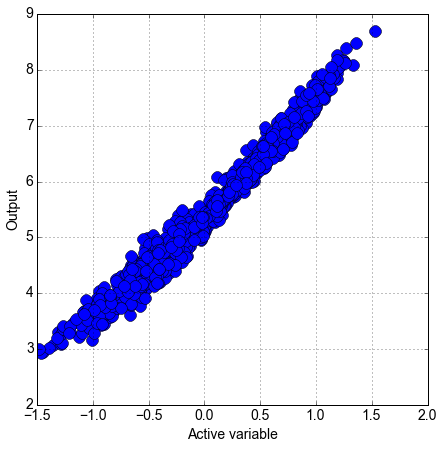

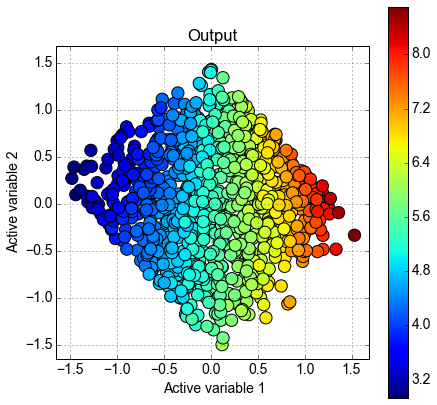

In [10]:
if (n <= 2):
    active_subspaces.utils.plotters.sufficient_summary(Y, f[1:k])

***NOTE: ONLY RUN THIS CODE BLOCK TO GENERATE A NEW DATASET***  
Run to generate a new .npz file containing a data set. The file will default to the name, "thedata.npz". This may take several minutes depending on the number of points used in monte carlo estimation & quadrature rules. 

In [ ]:
import numpy as np
import active_subspaces
import matplotlib.pyplot as plt
import otlcircuit
# Set the number of parameter (m) 
m = 6
# Set the dimension of the active subspace (n)
n = 2
# Set the number of points per dimension for Gauss Legendre Quadrature
k = 6
# Compute ex0act solution for M randomly selected points
M = 100000
x0 = 2*np.random.rand(M,m)-1
f = np.zeros(M)
df = np.zeros((M,m))
for i in range(0,M):
    sample = x0[i,:].reshape(m)
    [out, gradout] = otlcircut.fun(sample)
    f[i] = out
    df[i,:] = gradout.T
    
#Gauss Legendre Quadrature of the C matrix
xx = (np.ones(m)*k).astype(np.int64).tolist()  
[x,w] = active_subspaces.utils.quadrature.gauss_legendre(xx)
C = np.zeros((m,m))
N = np.size(w)
for i in range(0,N):
    [Out,Gradout] = otlcircuit.fun(x[i,:])
    C = C + np.outer(Gradout,Gradout)*w[i]
# Eigenvalue decomposition    
[evals,WW] = np.linalg.eig(C)
# Ordering eigenvalues in decending order
order = np.argsort(evals)
order = np.flipud(order)
evals = evals[order]
W = np.zeros((m,m))
for jj in range(0,m):
    W[:,jj] = WW[:,order[jj]]

np.savez('thedata',m=m,n=n,M=M,f=f,df=df,x0=x0,evals=evals,W=W)